In [1]:
# read in binary file
import pandas as pd
resist = pd.read_csv('~/data0118/scoary_summary/resist.csv', index_col = 0, header = 0)

In [2]:
gold_anno = pd.read_csv('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno.csv', header = 0, index_col = 0) 

In [3]:
id_mapper = gold_anno.reset_index()[['index', 'cluster']].set_index('cluster')

In [4]:
# rename matrix
resist.columns = id_mapper.loc[resist.columns, 'index'].values

In [24]:
resist.head()

,562.10576.con.0026_20|562.10576,562.10576.con.0029_10|562.10576,562.10576.con.0029_16|562.10576,562.10576.con.0029_19|562.10576,562.10576.con.0029_44|562.10576,562.10576.con.0029_46|562.10576,562.10576.con.0029_6|562.10576,562.10576.con.0033_20|562.10576,562.10576.con.0037_1|562.10576,562.10576.con.0041_12|562.10576,...,NMWW01000332_5|562.19090,NMWW01000332_7|562.19090,NMWW01000332_8|562.19090,NMWW01000332_9|562.19090,NMWW01000333_10|562.19090,NMWW01000339_1|562.19090,NMWW01000349_6|562.19090,NMWW01000392_6|562.19090,NMWW01000413_7|562.19090,NMWW01000488_6|562.19090
ceftazidime,0,1,1,0,1,1,0,0,0,1,...,1,0,1,1,1,0,0,0,1,1
ciprofloxacin,0,0,0,0,0,1,0,1,0,0,...,1,1,1,1,1,1,0,1,1,0
cefuroxime,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,1,1
meropenem,0,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
cefotaxime,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0


# created from example
https://github.com/idekerlab/pyNBS/blob/master/Examples/CancerSubnetwork_BLCA_pyNBS_Notebook.ipynb

In [5]:
# Import pyNBS modules
from pyNBS import data_import_tools as dit
from pyNBS import network_propagation as prop
from pyNBS import pyNBS_core as core
from pyNBS import pyNBS_single
from pyNBS import consensus_clustering as cc
from pyNBS import pyNBS_plotting as plot

# Import other needed packages
import os
import time
import pandas as pd
import numpy as np

In [6]:
# The only required parameter for this function is the network file path

network_filepath = '/home/hermuba/data0118/network1122/sub_scoary_edge'
network = dit.load_network_file(network_filepath)

Network File Loaded: /home/hermuba/data0118/network1122/sub_scoary_edge


In [7]:
# Set or change network propagation coefficient if desired
alpha = 0.7
# Construct identity matrix of network
network_nodes = network.nodes()
network_I = pd.DataFrame(np.identity(len(network_nodes)), index=network_nodes, columns=network_nodes)
# Construct network propagation kernel
kernel = prop.network_propagation(network, network_I, alpha=alpha, symmetric_norm=False)

##########################################################################################################
# The resulting matrix can be very large, so we choose not to save the intermediate result here
# To run this function and save the propagation kernel to the output directory 'outdir' given above,
# Uncomment and run the following two lines instead of the above line:
# save_args['iteration_label']='kernel'
# kernel = prop.network_propagation(network, network_I, alpha=alpha, symmetric_norm=True, **save_args)
##########################################################################################################

Performing network propagation with alpha: 0.7
Network Propagation Complete: 40.7085690498 seconds


In [8]:

# Constructing knnGlap
knnGlap = core.network_inf_KNN_glap(network)

Graph influence matrix calculated: 10.2563121319 seconds
Graph laplacian of KNN network from influence matrix calculated: 18.8746128082 seconds


In [9]:
resist.index

Index([u'ceftazidime', u'ciprofloxacin', u'cefuroxime', u'meropenem',
       u'cefotaxime', u'tobramycin', u'amoxicillin-clavunate', u'amoxicillin',
       u'ertapenem', u'trimethoprim-sulfamethoxazole', u'aztreonam',
       u'piperacillin-tazobactam', u'gentamicin', u'imipenem', u'tigecycline',
       u'cefalotin', u'trimethoprim', u'ampicillin', u'cefepime', u'cefoxitin',
       u'amikacin'],
      dtype='object')

In [10]:
# Set the number of times to perform pyNBS core steps
niter = 100

In [11]:
# Optional: Saving the intermediate propagation step (from subsampled data) to file
# save_args['save_prop'] = True
clusters = 6
# Run pyNBS 'niter' number of times
Hlist = []
for i in range(niter):
    netNMF_time = time.time()
    # Run pyNBS core steps and save resulting H matrix to Hlist
    Hlist.append(pyNBS_single.NBS_single(resist, propNet=network, propNet_kernel=kernel, regNet_glap=knnGlap, k=clusters))
    
    ##########################################################################################################
    # Optional: If the user is saving intermediate outputs (propagation results or H matrices), 
    # a different 'iteration_label' should be used for each call of pyNBS_single().
    # Otherwise, the user will overwrite each H matrix at each call of pyNBS_single()
    # Uncomment and run the two lines below to save intermediate steps instead of the previous line
    # save_args['iteration_label']=str(i+1)
    # Hlist.append(pyNBS_single.NBS_single(sm_mat, propNet=network, propNet_kernel=kernel, regNet_glap=knnGlap, 
    #                                      k=clusters, **save_args))
    ##########################################################################################################
    
    # Report run time of each pyNBS iteration
    t = time.time()-netNMF_time
    print 'NBS iteration:', i+1, 'complete:', t, 'seconds'

/home/hermuba/miniconda3/envs/py27/lib/python2.7/site-packages/pyNBS-0.2.0-py2.7.egg/pyNBS/pyNBS_core.py:83: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


NBS iteration: 1 complete: 22.7240331173 seconds
NBS iteration: 2 complete: 22.2998621464 seconds
NBS iteration: 3 complete: 23.1943290234 seconds
NBS iteration: 4 complete: 22.2563068867 seconds
NBS iteration: 5 complete: 21.4755318165 seconds
NBS iteration: 6 complete: 22.1462271214 seconds
NBS iteration: 7 complete: 23.9044659138 seconds
NBS iteration: 8 complete: 23.700551033 seconds
NBS iteration: 9 complete: 21.0297532082 seconds
NBS iteration: 10 complete: 21.1738409996 seconds
NBS iteration: 11 complete: 21.8306829929 seconds
NBS iteration: 12 complete: 22.1755838394 seconds
NBS iteration: 13 complete: 22.088463068 seconds
NBS iteration: 14 complete: 21.7654559612 seconds
NBS iteration: 15 complete: 21.4303619862 seconds
NBS iteration: 16 complete: 24.272354126 seconds
NBS iteration: 17 complete: 21.9680740833 seconds
NBS iteration: 18 complete: 22.9300429821 seconds
NBS iteration: 19 complete: 24.489030838 seconds
NBS iteration: 20 complete: 22.7213439941 seconds
NBS iteration

In [15]:
Hlist[0]

,0,1,2,3,4,5
gentamicin,1.536053e+02,4.729229e+01,3.328016e+01,1.624744e+02,3.578670e+02,4.387017e+02
ertapenem,5.942696e+01,2.650477e+02,1.758030e+02,8.956758e+01,5.881954e+02,1.000000e-15
cefoxitin,3.580415e+01,2.343420e+02,2.681627e+02,1.008119e+01,6.206735e+02,7.197530e+00
tigecycline,7.783918e+01,9.735706e+02,1.100472e+01,7.571319e+01,1.000000e-15,4.190494e+01
ampicillin,1.000000e-15,1.000000e-15,6.044676e+02,1.079601e+02,5.019704e+00,4.844420e+02
ceftazidime,4.172017e+02,1.000000e-15,3.272366e+01,2.709620e+02,2.338659e+02,2.518110e+02
tobramycin,1.000000e-15,5.873441e+01,1.000000e-15,2.159586e+02,3.855871e+02,5.090542e+02
cefuroxime,6.531611e-03,3.059152e+02,1.605127e+00,1.006845e+02,4.242115e+01,6.891424e+02
meropenem,5.452641e+02,1.000000e-15,1.306569e+02,1.410384e+02,3.606984e+02,1.000000e-15
piperacillin-tazobactam,5.675756e+01,6.225004e+01,3.508434e+02,6.463051e+02,1.000000e-15,4.952775e+01


In [18]:
NBS_cc_table, NBS_cc_linkage, NBS_cluster_assign = cc.consensus_hclust_hard(Hlist, k=clusters)

Constructing Hlist: 100 cluster matrices,  21 samples


/home/hermuba/miniconda3/envs/py27/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Hlist consensus constructed and sample clusters assigned


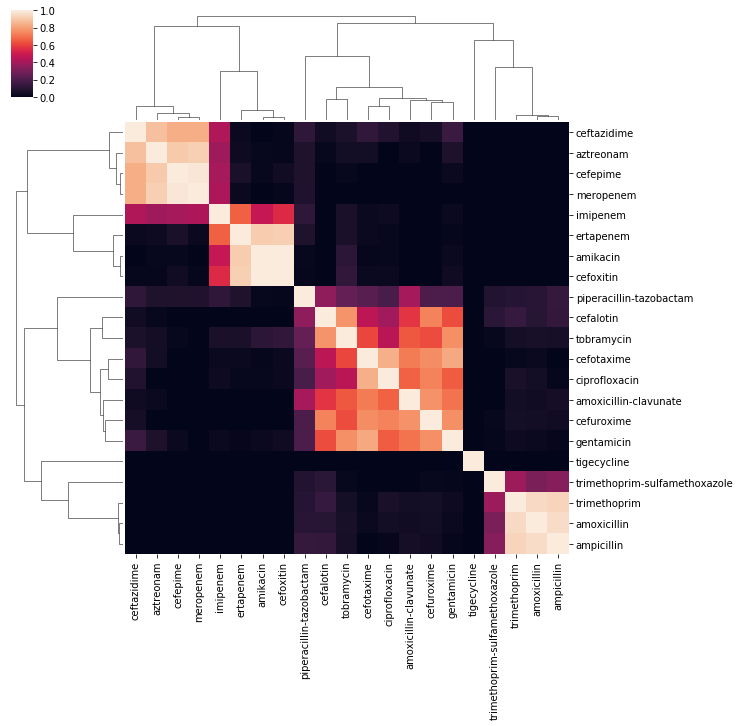

In [21]:
%matplotlib inline
import seaborn as sns
sns.clustermap(NBS_cc_table)

In [26]:
NBS_cluster_assign.sort_values()

meropenem                        1
aztreonam                        1
cefepime                         1
ceftazidime                      1
amikacin                         2
imipenem                         2
ertapenem                        2
cefoxitin                        2
trimethoprim                     3
trimethoprim-sulfamethoxazole    3
ampicillin                       3
amoxicillin                      3
cefalotin                        4
ciprofloxacin                    4
gentamicin                       4
amoxicillin-clavunate            4
tobramycin                       4
cefotaxime                       4
cefuroxime                       4
piperacillin-tazobactam          5
tigecycline                      6
Name: CC Hard, k=6, dtype: int64